# clustering

### K-Means clustering

In [4]:
%pip install yellowbrick

In [5]:
url ="https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/Mall_Customers.csv"
print(url)


https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/Mall_Customers.csv


In [6]:
import pandas as pd
df = pd.read_csv(url)
df.head()

,CustomerID,Gender,Age,Income,Spending
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**Step 2 - Perform basic data quality cheak**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  200 non-null    int64 
 1   Gender      200 non-null    object
 2   Age         200 non-null    int64 
 3   Income      200 non-null    int64 
 4   Spending    200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df.duplicated().sum()

0

In [9]:
df.isna().sum()

,0
CustomerID,0
Gender,0
Age,0
Income,0
Spending,0


**Step 3 - seaperat X values**

In [10]:
X = df[["Income","Spending"]]
X.head()

,Income,Spending
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


<Axes: xlabel='Income', ylabel='Spending'>

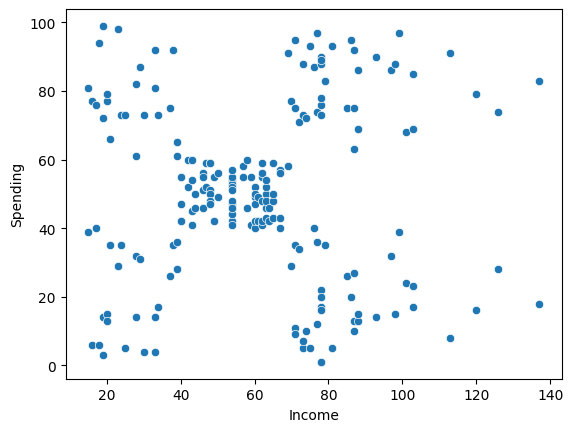

In [11]:
import seaborn as sns
sns.scatterplot(data=df, x="Income",y="Spending")

**Step 4 - Apply Preprocessing on X**

In [12]:
X.dtypes

,0
Income,int64
Spending,int64


In [13]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [14]:
num_pipe = make_pipeline(
    SimpleImputer(strategy= "median"),
    StandardScaler()
).set_output(transform = "pandas")


X_pre = num_pipe.fit_transform(X)
X_pre.head()


,Income,Spending
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


**Step 5 - Decide number of clusters**

In [15]:
from sklearn.cluster import KMeans

In [16]:
from yellowbrick.cluster import KElbowVisualizer

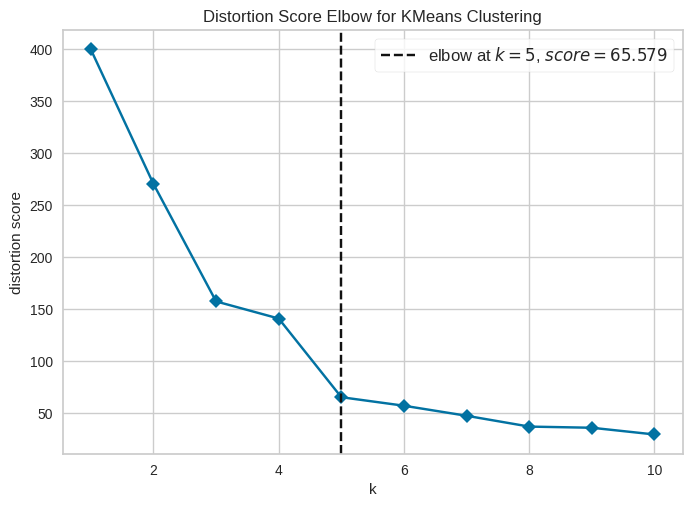

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [17]:
vis = KElbowVisualizer(KMeans(), k=(1,11), timings=False)
vis.fit(X_pre)
vis.show()

**From above graph it is clear  that number of clusters should be 5**

In [18]:
model_km = KMeans(n_clusters=5)
model_km.fit(X_pre)

KMeans(n_clusters=5)

In [19]:
label1 = model_km.predict(X_pre)
label1

array([1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 4,
       1, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 2, 0, 4, 0, 2, 0, 2, 0,
       4, 0, 2, 0, 2, 0, 2, 0, 2, 0, 4, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int32)

In [20]:
X_km = X.copy()
X_km

,Income,Spending
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [21]:
X_km["cluster"] = label1
X_km

,Income,Spending,cluster
0,15,39,1
1,15,81,3
2,16,6,1
3,16,77,3
4,17,40,1
...,...,...,...
195,120,79,0
196,126,28,2
197,126,74,0
198,137,18,2


In [22]:
X_km.query("cluster == 0")

,Income,Spending,cluster
123,69,91,0
125,70,77,0
127,71,95,0
129,71,75,0
131,71,75,0
133,72,71,0
135,73,88,0
137,73,73,0
139,74,72,0
141,75,93,0


In [24]:
for i in range(5):
  print(f"cluster : {i}")
  display(X_km.query(f"cluster == {i}"))
  print("\n=================================\n")

cluster : 0


,Income,Spending,cluster
123,69,91,0
125,70,77,0
127,71,95,0
129,71,75,0
131,71,75,0
133,72,71,0
135,73,88,0
137,73,73,0
139,74,72,0
141,75,93,0




cluster : 1


,Income,Spending,cluster
0,15,39,1
2,16,6,1
4,17,40,1
6,18,6,1
8,19,3,1
10,19,14,1
12,20,15,1
14,20,13,1
16,21,35,1
18,23,29,1




cluster : 2


,Income,Spending,cluster
124,70,29,2
128,71,11,2
130,71,9,2
134,73,5,2
136,73,7,2
138,74,10,2
140,75,5,2
144,77,12,2
146,77,36,2
148,78,22,2




cluster : 3


,Income,Spending,cluster
1,15,81,3
3,16,77,3
5,17,76,3
7,18,94,3
9,19,72,3
11,19,99,3
13,20,77,3
15,20,79,3
17,21,66,3
19,23,98,3




cluster : 4


,Income,Spending,cluster
43,39,61,4
46,40,55,4
47,40,47,4
48,40,42,4
49,40,42,4
...,...,...,...
121,67,40,4
122,69,58,4
126,71,35,4
132,72,34,4


In [25]:
X_km.to_csv("KMeansRes.csv", index=False)

In [26]:
c1 = X_km.groupby("cluster").mean()
c1

,Income,Spending
cluster,,
0,86.538462,82.128205
1,26.304348,20.913043
2,88.200000,17.114286
3,25.727273,79.363636
4,55.296296,49.518519


**Visualize above results**

<Axes: xlabel='Income', ylabel='Spending'>

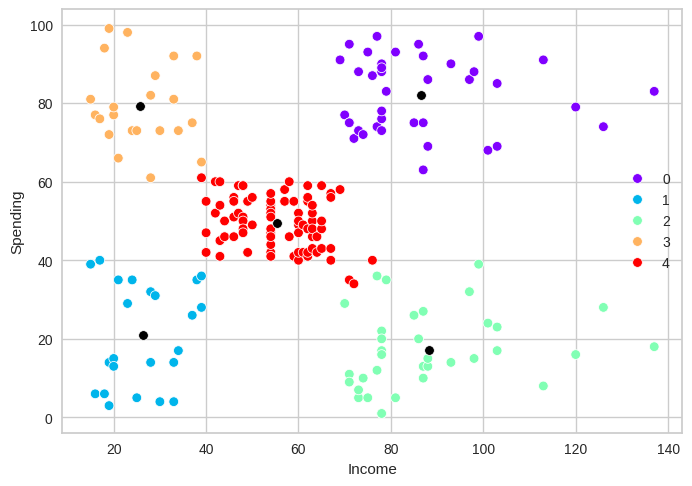

In [28]:
sns.scatterplot(data=X_km, x="Income", y="Spending", hue="cluster", palette="rainbow")
sns.scatterplot(data=c1, x="Income", y="Spending", color="black")


### Hierarchial Clustering

aglomerative (bottom Up)Clustering

In [29]:
X_pre.head()

,Income,Spending
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


### Decide number of clusters for Aglomerative Clustering

In [30]:
from sklearn.cluster import AgglomerativeClustering

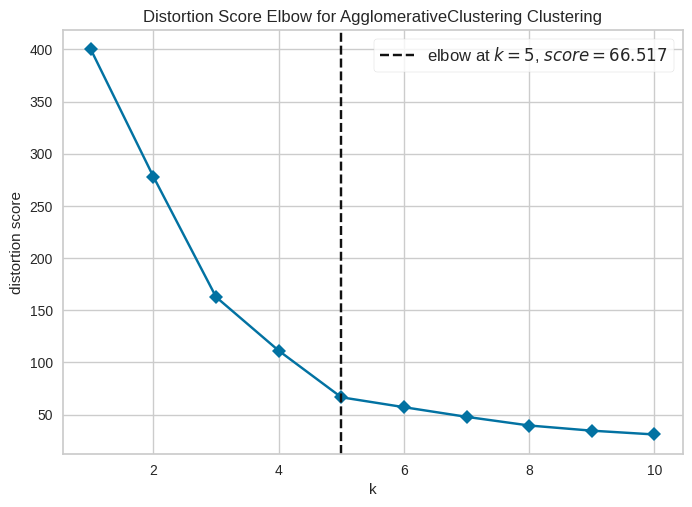

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [31]:
vis2 = KElbowVisualizer(AgglomerativeClustering(), k=(1, 11), timings= False)
vis2.fit(X_pre)
vis2.show()

### **Model with lower score is considered better**


Create a model for Aglomerative

In [32]:
model_agc = AgglomerativeClustering(n_clusters=5)
model_agc.fit(X_pre)

AgglomerativeClustering(n_clusters=5)

In [33]:
AgglomerativeClustering(n_clusters=5)

AgglomerativeClustering(n_clusters=5)

In [34]:
labels2 = model_agc.fit_predict(X_pre)
labels2

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [35]:
X_agc = X.copy()
X_agc

,Income,Spending
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [36]:
X_agc["Cluster"] = labels2
X_agc


,Income,Spending,Cluster
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4
...,...,...,...
195,120,79,1
196,126,28,0
197,126,74,1
198,137,18,0


In [37]:
X_agc.query("Cluster == 0")

,Income,Spending,Cluster
128,71,11,0
130,71,9,0
134,73,5,0
136,73,7,0
138,74,10,0
140,75,5,0
144,77,12,0
148,78,22,0
150,78,17,0
152,78,20,0


In [39]:
for i in range(5):
  print(f"Cluster : {i}")
  display(X_agc.query(f"Cluster == {i}"))
  print("\n==============================================\n")

Cluster : 0


,Income,Spending,Cluster
128,71,11,0
130,71,9,0
134,73,5,0
136,73,7,0
138,74,10,0
140,75,5,0
144,77,12,0
148,78,22,0
150,78,17,0
152,78,20,0




Cluster : 1


,Income,Spending,Cluster
123,69,91,1
125,70,77,1
127,71,95,1
129,71,75,1
131,71,75,1
133,72,71,1
135,73,88,1
137,73,73,1
139,74,72,1
141,75,93,1




Cluster : 2


,Income,Spending,Cluster
43,39,61,2
45,39,65,2
46,40,55,2
47,40,47,2
48,40,42,2
...,...,...,...
126,71,35,2
132,72,34,2
142,76,40,2
146,77,36,2




Cluster : 3


,Income,Spending,Cluster
1,15,81,3
3,16,77,3
5,17,76,3
7,18,94,3
9,19,72,3
11,19,99,3
13,20,77,3
15,20,79,3
17,21,66,3
19,23,98,3




Cluster : 4


,Income,Spending,Cluster
0,15,39,4
2,16,6,4
4,17,40,4
6,18,6,4
8,19,3,4
10,19,14,4
12,20,15,4
14,20,13,4
16,21,35,4
18,23,29,4


In [40]:
c2 = X_agc.groupby("Cluster").mean()
c2

,Income,Spending
Cluster,,
0,89.406250,15.593750
1,86.538462,82.128205
2,55.811765,49.129412
3,25.095238,80.047619
4,26.304348,20.913043


<Axes: xlabel='Income', ylabel='Spending'>

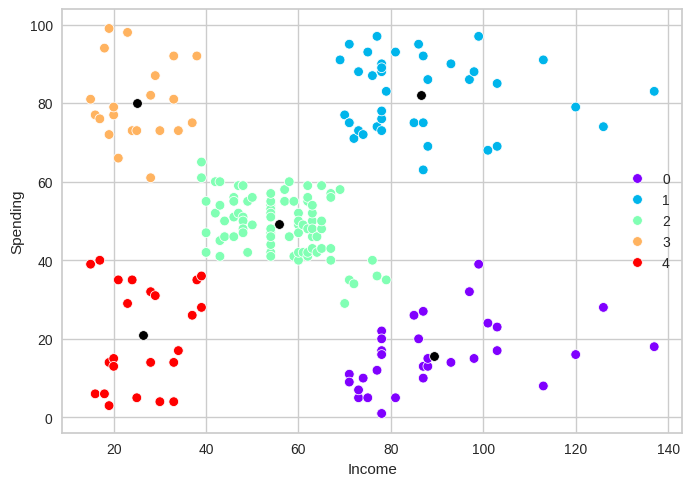

In [41]:
sns.scatterplot(data=X_agc, x="Income", y="Spending", hue="Cluster", palette="rainbow")
sns.scatterplot(data=c2, x="Income", y="Spending", color="black")

In [42]:
X_agc.to_csv("AGCRes.csv", index=False)